In [1]:
from pandas import DataFrame
import os
import pandas as pd

from datetime import datetime
import time
import numpy as np


import matplotlib.pyplot as plt
import pycountry_convert as pc

import seaborn as sns
import matplotlib.pyplot as plt

/home/WUR/hwang004/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/WUR/hwang004/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
### Importing data ###

import os
import pandas as pd

# Define the base path to the annuna directory
base_path = '/home/WUR/hwang004/mushroom_data'

# Define the names of the directories
directories = ['first_week', 'second_week', 'third_week']

# Define the names of the CSV files
csv_files = ['temperature.csv', 'humidity.csv', 'moisture.csv', 'light.csv']

# Create a dictionary to store the data
data = {file: [] for file in csv_files}

# Loop through each directory and read the CSV files
for directory in directories:
    dir_path = os.path.join(base_path, directory)
    
    for file in csv_files:
        file_path = os.path.join(dir_path, file)
        
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df['week'] = directory  # Add a column to identify the week
            data[file].append(df)
        else:
            print(f"File {file_path} not found.")

# Concatenate the dataframes for each type of data
temperature_data = pd.concat(data['temperature.csv'], ignore_index=True)
humidity_data = pd.concat(data['humidity.csv'], ignore_index=True)
moisture_data = pd.concat(data['moisture.csv'], ignore_index=True)
light_data = pd.concat(data['light.csv'], ignore_index=True)





In [3]:
# Assuming all dataframes have a common column to merge on, like a timestamp or an ID
# If there is no common column, you may need to add indices or use other logic to merge appropriately

# Merge the dataframes
merged_data = temperature_data.merge(humidity_data, on=['week', 'time'], suffixes=('_temp', '_hum'))
merged_data = merged_data.merge(moisture_data, on=['week', 'time'], suffixes=('', '_moist'))
merged_data = merged_data.merge(light_data, on=['week', 'time'], suffixes=('', '_light'))

# Display the merged dataframe
display(merged_data)

# Filter rows where value_temp and value_hum are greater than 0
filtered_data = merged_data[(merged_data['value_temp'] > 0) & (merged_data['value_hum'] > 0) & (merged_data['value'] > 0)]

# Display the filtered dataframe
display(filtered_data.head(4))  # Display first four rows


,time,value_temp,week,value_hum,value,value_light
0,2024-06-07T09:13:35.771420964Z,-2.000000,first_week,-2.000000,100,132
1,2024-06-07T09:20:20.157132661Z,-2.000000,first_week,-2.000000,100,141
2,2024-06-07T09:26:08.419493995Z,23.759258,first_week,33.717957,0,115
3,2024-06-07T09:29:17.247428592Z,-3.000000,first_week,-2.000000,100,155
4,2024-06-07T09:33:38.779813145Z,24.500000,first_week,32.881500,0,139
...,...,...,...,...,...,...
2346,2024-06-27T08:44:14.032823419Z,26.185184,third_week,68.381424,100,2157
2347,2024-06-27T08:44:14.76120324Z,26.203705,third_week,68.219528,98,2156
2348,2024-06-27T08:44:15.38606423Z,26.185184,third_week,68.318466,100,2155
2349,2024-06-27T08:44:16.014978923Z,26.203705,third_week,68.270500,98,2152


,time,value_temp,week,value_hum,value,value_light
5,2024-06-07T09:58:25.8510491Z,23.055555,first_week,38.493855,38,105
6,2024-06-07T09:58:26.363095215Z,23.037037,first_week,38.400913,39,22
7,2024-06-07T09:58:46.135041315Z,23.240742,first_week,39.711063,42,162
8,2024-06-07T09:58:46.637455337Z,23.259258,first_week,39.804001,40,120


In [4]:

# from datetime import datetime

# Assuming 'value_temp' and 'value_hum' are the column names in the merged dataframe
filtered_data = merged_data[(merged_data['value_temp'] >= 0) & (merged_data['value_hum'] >= 0)]


# # Convert the 'timestamp' column to datetime
# filtered_data['time'] = pd.to_datetime(filtered_data['time'], format="%Y-%m-%dT%H:%M:%S.%fZ")

# Display the filtered dataframe
display(filtered_data)

,time,value_temp,week,value_hum,value,value_light
2,2024-06-07T09:26:08.419493995Z,23.759258,first_week,33.717957,0,115
4,2024-06-07T09:33:38.779813145Z,24.500000,first_week,32.881500,0,139
5,2024-06-07T09:58:25.8510491Z,23.055555,first_week,38.493855,38,105
6,2024-06-07T09:58:26.363095215Z,23.037037,first_week,38.400913,39,22
7,2024-06-07T09:58:46.135041315Z,23.240742,first_week,39.711063,42,162
...,...,...,...,...,...,...
2346,2024-06-27T08:44:14.032823419Z,26.185184,third_week,68.381424,100,2157
2347,2024-06-27T08:44:14.76120324Z,26.203705,third_week,68.219528,98,2156
2348,2024-06-27T08:44:15.38606423Z,26.185184,third_week,68.318466,100,2155
2349,2024-06-27T08:44:16.014978923Z,26.203705,third_week,68.270500,98,2152


In [5]:
# Define a function to extract the date from a timestamp
# Convert 'time' column to datetime and format it to 'YYYY-MM-DD'
filtered_data['time'] = pd.to_datetime(filtered_data['time']).dt.date

# Rename the column from 'time' to 'date'
filtered_data.rename(columns={'time': 'date'}, inplace=True)

display(filtered_data)

<ipython-input-5-7af2792506a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['time'] = pd.to_datetime(filtered_data['time']).dt.date
<ipython-input-5-7af2792506a2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns={'time': 'date'}, inplace=True)


,date,value_temp,week,value_hum,value,value_light
2,2024-06-07,23.759258,first_week,33.717957,0,115
4,2024-06-07,24.500000,first_week,32.881500,0,139
5,2024-06-07,23.055555,first_week,38.493855,38,105
6,2024-06-07,23.037037,first_week,38.400913,39,22
7,2024-06-07,23.240742,first_week,39.711063,42,162
...,...,...,...,...,...,...
2346,2024-06-27,26.185184,third_week,68.381424,100,2157
2347,2024-06-27,26.203705,third_week,68.219528,98,2156
2348,2024-06-27,26.185184,third_week,68.318466,100,2155
2349,2024-06-27,26.203705,third_week,68.270500,98,2152


In [6]:
fourth_fifth_sixweek = pd.read_csv("other_part.csv")
#display(fourth_fifth_sixweek)

fourth_fifth_sixweek['time'] = pd.to_datetime(fourth_fifth_sixweek['time']).dt.date

# Rename the column from 'time' to 'date'
fourth_fifth_sixweek.rename(columns={'time': 'date'}, inplace=True)
fourth_fifth_sixweek.drop(columns=['Unnamed: 0'], inplace=True)


display(fourth_fifth_sixweek)

# Concatenate A and fourth_fifth_sixweek along the rows (axis=0)
final_data = pd.concat([filtered_data, fourth_fifth_sixweek], axis=0)
final_data = pd.DataFrame(final_data)
display(final_data)

# # Optionally, reset the index if needed
# final_data.reset_index(drop=True, inplace=True)
# final_data.drop(columns=['Unnamed: 0'], inplace=True)
# final_data.columns = [col.replace('value', 'moisture') for col in final_data.columns]
# display(final_data)

,date,value_temp,week,value_hum,value,value_light
0,2024-07-01,18.925926,fourth_week,82.367340,100,1500
1,2024-07-01,20.685184,fourth_week,77.816292,100,1538
2,2024-07-01,21.314816,fourth_week,63.782417,100,2173
3,2024-07-01,22.870371,fourth_week,59.627117,100,2182
4,2024-07-01,22.666668,fourth_week,59.243366,100,1199
...,...,...,...,...,...,...
84,2024-07-17,24.888889,six,42.712112,100,16
85,2024-07-18,24.796295,six,44.729797,100,16
86,2024-07-18,24.370371,six,48.042648,100,35
87,2024-07-19,26.407410,six,47.742844,100,317


,date,value_temp,week,value_hum,value,value_light
2,2024-06-07,23.759258,first_week,33.717957,0,115
4,2024-06-07,24.500000,first_week,32.881500,0,139
5,2024-06-07,23.055555,first_week,38.493855,38,105
6,2024-06-07,23.037037,first_week,38.400913,39,22
7,2024-06-07,23.240742,first_week,39.711063,42,162
...,...,...,...,...,...,...
84,2024-07-17,24.888889,six,42.712112,100,16
85,2024-07-18,24.796295,six,44.729797,100,16
86,2024-07-18,24.370371,six,48.042648,100,35
87,2024-07-19,26.407410,six,47.742844,100,317


In [7]:
## filling in empty dates

# first remove Unnamed: 0



In [8]:
# Create a boolean series indicating rows with any NaN values
rows_with_nan = final_data.isnull().any(axis=1)

# Use this boolean series to filter the dataframe
final_data_df = final_data[rows_with_nan]

# Display the rows with NaN values
display(final_data_df)

,date,value_temp,week,value_hum,value,value_light


In [9]:
### calling output data

output = pd.read_csv("data_for_output2.csv")
display(output)
display(output.columns)


# output_1 = pd.read_csv("number_mushrooms.csv")
# display(output_1)
# display(output_1.columns)

,Unnamed: 0,mass of medium without sensor,length,diameter,weight of harvested mushroom,number of mushrooms in a bunch,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,2024/06/06,1132.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024/06/07,NaN,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024/06/08,NaN,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024/06/09,NaN,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024/06/10,NaN,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024/06/11,NaN,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024/06/12,NaN,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2024/06/13,NaN,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2024/06/14,NaN,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024/06/15,NaN,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Index(['Unnamed: 0', 'mass of medium without sensor', 'length', 'diameter',
       'weight of harvested mushroom', 'number of mushrooms in a bunch',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'],
      dtype='object')

In [10]:
output.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
display(output)


# Remove columns that start with 'Unnamed: '
output = output.loc[:, ~output.columns.str.startswith('Unnamed: ')]
output = pd.DataFrame(output)
# Display the modified DataFrame
print("\nModified DataFrame:")
display(output)

,date,mass of medium without sensor,length,diameter,weight of harvested mushroom,number of mushrooms in a bunch,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,2024/06/06,1132.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024/06/07,NaN,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024/06/08,NaN,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024/06/09,NaN,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024/06/10,NaN,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024/06/11,NaN,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024/06/12,NaN,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2024/06/13,NaN,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2024/06/14,NaN,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024/06/15,NaN,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Modified DataFrame:


,date,mass of medium without sensor,length,diameter,weight of harvested mushroom,number of mushrooms in a bunch
0,2024/06/06,1132.0,0.0,0.0,0.0,0
1,2024/06/07,NaN,0.0,0.0,0.0,0
2,2024/06/08,NaN,0.0,0.0,0.0,0
3,2024/06/09,NaN,0.0,0.0,0.0,0
4,2024/06/10,NaN,0.0,0.0,0.0,0
5,2024/06/11,NaN,0.0,0.0,0.0,0
6,2024/06/12,NaN,0.0,0.0,0.0,0
7,2024/06/13,NaN,0.0,0.0,0.0,0
8,2024/06/14,NaN,0.0,0.0,0.0,0
9,2024/06/15,NaN,0.0,0.0,0.0,0


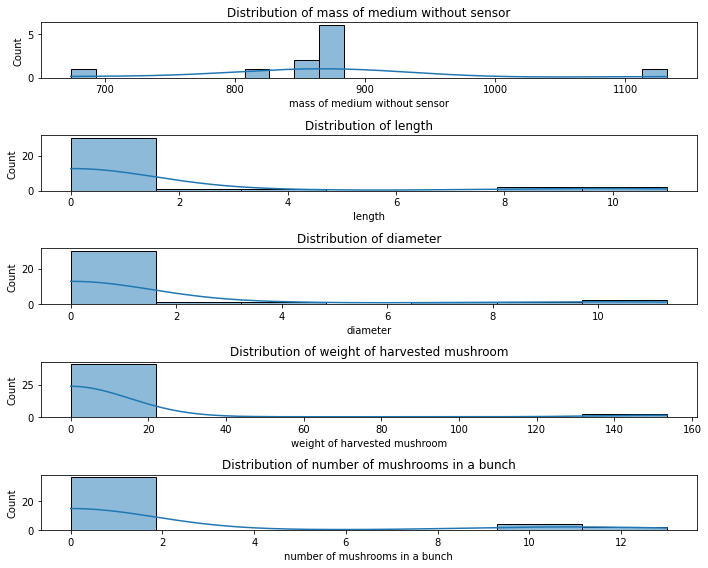

In [11]:
# Initialize plot counter
plot_counter = 1

# Set the figure size (width, height in inches)
plt.figure(figsize=(10, 8))

# Loop through each column and plot its distribution
for col in output.columns:
    if col == 'date':
        continue  # Skip the 'date' column
    plt.subplot(len(output.columns) - 1, 1, plot_counter)  # Create a subplot for each non-date column
    sns.histplot(output[col], kde=True)  # Plot histogram and KDE (Kernel Density Estimate)
    plt.title(f'Distribution of {col}')  # Add a title for each subplot
    plot_counter += 1  # Increment plot counter

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


In [12]:
## filling in NaN cells with mean/median in output data

mean_medium = output['mass of medium without sensor'].mean()
median_length =  output['length'].median()
median_diameter =  output['diameter'].mean()
median_weight =  output['weight of harvested mushroom'].mean()


output['mass of medium without sensor'].fillna(mean_medium, inplace=True)
output['length'].fillna(median_length, inplace=True)
output['diameter'].fillna(median_diameter, inplace=True)
output['weight of harvested mushroom'].fillna(median_weight, inplace=True)

display(output)

,date,mass of medium without sensor,length,diameter,weight of harvested mushroom,number of mushrooms in a bunch
0,2024/06/06,1132.000000,0.0,0.000000,0.0,0
1,2024/06/07,872.545455,0.0,0.000000,0.0,0
2,2024/06/08,872.545455,0.0,0.000000,0.0,0
3,2024/06/09,872.545455,0.0,0.000000,0.0,0
4,2024/06/10,872.545455,0.0,0.000000,0.0,0
5,2024/06/11,872.545455,0.0,0.000000,0.0,0
6,2024/06/12,872.545455,0.0,0.000000,0.0,0
7,2024/06/13,872.545455,0.0,0.000000,0.0,0
8,2024/06/14,872.545455,0.0,0.000000,0.0,0
9,2024/06/15,872.545455,0.0,0.000000,0.0,0


mass of medium = unskewed
length = skewed
diameter = skewed
weight of harvested mushroom = skewed


In [13]:

final_data['date'] = pd.to_datetime(final_data['date'])
output['date'] = pd.to_datetime(output['date'])
display(final_data.dtypes)
display(output.dtypes)


# Merge using pd.merge_asof
merged_df = pd.merge_asof(final_data, output, on='date')

display(merged_df)

date           datetime64[ns]
value_temp            float64
week                   object
value_hum             float64
value                   int64
value_light             int64
dtype: object

date                              datetime64[ns]
mass of medium without sensor            float64
length                                   float64
diameter                                 float64
weight of harvested mushroom             float64
number of mushrooms in a bunch             int64
dtype: object

,date,value_temp,week,value_hum,value,value_light,mass of medium without sensor,length,diameter,weight of harvested mushroom,number of mushrooms in a bunch
0,2024-06-07,23.759258,first_week,33.717957,0,115,872.545455,0.0,0.000000,0.0,0
1,2024-06-07,24.500000,first_week,32.881500,0,139,872.545455,0.0,0.000000,0.0,0
2,2024-06-07,23.055555,first_week,38.493855,38,105,872.545455,0.0,0.000000,0.0,0
3,2024-06-07,23.037037,first_week,38.400913,39,22,872.545455,0.0,0.000000,0.0,0
4,2024-06-07,23.240742,first_week,39.711063,42,162,872.545455,0.0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2425,2024-07-17,24.888889,six,42.712112,100,16,850.000000,7.9,7.200000,0.0,13
2426,2024-07-18,24.796295,six,44.729797,100,16,817.000000,11.0,11.300000,147.0,11
2427,2024-07-18,24.370371,six,48.042648,100,35,817.000000,11.0,11.300000,147.0,11
2428,2024-07-19,26.407410,six,47.742844,100,317,674.000000,0.0,1.244444,0.0,0


In [14]:
# Define crucial dates
start_date = pd.to_datetime('2024-06-07')
reset_date = pd.to_datetime('2024-07-02')
reset_date2 = pd.to_datetime('2024-07-18')


# Custom function to calculate days passed
def calculate_days_passed(row_date):
    if row_date <= reset_date:
        return (row_date - start_date).days
    elif row_date <= reset_date2:
        return (row_date - reset_date).days
    else:
        return (row_date - reset_date2).days
    
# Apply the function to create 'days_passed' column
merged_df['days_passed'] = merged_df['date'].apply(calculate_days_passed)
display(merged_df)

filtered_data_final = merged_df[(merged_df['weight of harvested mushroom'] > 0) & (merged_df['number of mushrooms in a bunch'] > 0)]
display(filtered_data_final.head(4))

,date,value_temp,week,value_hum,value,value_light,mass of medium without sensor,length,diameter,weight of harvested mushroom,number of mushrooms in a bunch,days_passed
0,2024-06-07,23.759258,first_week,33.717957,0,115,872.545455,0.0,0.000000,0.0,0,0
1,2024-06-07,24.500000,first_week,32.881500,0,139,872.545455,0.0,0.000000,0.0,0,0
2,2024-06-07,23.055555,first_week,38.493855,38,105,872.545455,0.0,0.000000,0.0,0,0
3,2024-06-07,23.037037,first_week,38.400913,39,22,872.545455,0.0,0.000000,0.0,0,0
4,2024-06-07,23.240742,first_week,39.711063,42,162,872.545455,0.0,0.000000,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2425,2024-07-17,24.888889,six,42.712112,100,16,850.000000,7.9,7.200000,0.0,13,15
2426,2024-07-18,24.796295,six,44.729797,100,16,817.000000,11.0,11.300000,147.0,11,16
2427,2024-07-18,24.370371,six,48.042648,100,35,817.000000,11.0,11.300000,147.0,11,16
2428,2024-07-19,26.407410,six,47.742844,100,317,674.000000,0.0,1.244444,0.0,0,1


,date,value_temp,week,value_hum,value,value_light,mass of medium without sensor,length,diameter,weight of harvested mushroom,number of mushrooms in a bunch,days_passed
2349,2024-07-02,28.000000,fourth_week,45.536278,100,1384,872.545455,10.5,10.7,153.5,10,25
2350,2024-07-02,29.555557,fourth_week,41.015213,100,2386,872.545455,10.5,10.7,153.5,10,25
2351,2024-07-02,31.388889,fourth_week,36.940865,100,1485,872.545455,10.5,10.7,153.5,10,25
2352,2024-07-02,32.962963,fourth_week,32.302879,100,1342,872.545455,10.5,10.7,153.5,10,25


value_temp = 28.5
value_hum = 42.49
moisture = 16
value_light = 467
mass of medium without sensor = 872.55


## data exploration

In [15]:
## variation inflation factor 

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Drop the output variable 'eu_cold_damage', 'pack_encoded', and 'variety_encoded' from new_merged1
columns_to_exclude = [col for col in merged_df .columns if(col.startswith('week') or col.startswith('date'))]
merged_df = merged_df.drop(columns=columns_to_exclude)

merged_df.rename(columns={'value_temp': 'temperature', 
                          'value_hum': 'humidity',
                          'value': 'moisture', 
                          'value_light': 'light',
                          'mass of medium without sensor': 'medium_weight',
                          'number of mushrooms in a bunch': 'mushroom_number'}, 
                 inplace=True)

display(merged_df)

filtered_data_final = merged_df[merged_df['mushroom_number'] > 0]
display(filtered_data_final.head(4))

merged_df.to_csv("data_netlogo.csv", index=False)



,temperature,humidity,moisture,light,medium_weight,length,diameter,weight of harvested mushroom,mushroom_number,days_passed
0,23.759258,33.717957,0,115,872.545455,0.0,0.000000,0.0,0,0
1,24.500000,32.881500,0,139,872.545455,0.0,0.000000,0.0,0,0
2,23.055555,38.493855,38,105,872.545455,0.0,0.000000,0.0,0,0
3,23.037037,38.400913,39,22,872.545455,0.0,0.000000,0.0,0,0
4,23.240742,39.711063,42,162,872.545455,0.0,0.000000,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
2425,24.888889,42.712112,100,16,850.000000,7.9,7.200000,0.0,13,15
2426,24.796295,44.729797,100,16,817.000000,11.0,11.300000,147.0,11,16
2427,24.370371,48.042648,100,35,817.000000,11.0,11.300000,147.0,11,16
2428,26.407410,47.742844,100,317,674.000000,0.0,1.244444,0.0,0,1


,temperature,humidity,moisture,light,medium_weight,length,diameter,weight of harvested mushroom,mushroom_number,days_passed
2341,18.925926,82.367340,100,1500,872.545455,9.0,9.0,0.0,12,24
2342,20.685184,77.816292,100,1538,872.545455,9.0,9.0,0.0,12,24
2343,21.314816,63.782417,100,2173,872.545455,9.0,9.0,0.0,12,24
2344,22.870371,59.627117,100,2182,872.545455,9.0,9.0,0.0,12,24


according to VIF analysis, temperature, diameter and weight of harvested mushroom are observed to be correlated with each other due to VIF > 10. This can bias the classification or regression performance. therefore it is recommended to remove variables with VIF > 10.


In [16]:
### examination of trend over cultivation & growth period
# import pandas as pd
# import matplotlib.pyplot as plt



# # Create a scatterplot
# plt.figure(figsize=(10, 6))
# plt.scatter(merged_df['date'], merged_df['temperature'], alpha=0.6)
# plt.title('Temperature Over Time')
# plt.xlabel('date')
# plt.ylabel('Temperature')
# plt.grid(True)
# plt.show()

# # Create a scatterplot
# plt.figure(figsize=(10, 6))
# plt.scatter(merged_df['date'], merged_df['humidity'], alpha=0.6)
# plt.title('humidity Over Time')
# plt.xlabel('date')
# plt.ylabel('humidity')
# plt.grid(True)
# plt.show()

In [17]:
# merged_df['possible to harvest?'] = ((merged_df['length'] > 10) & (merged_df['diameter'] > 10)).astype(int)
# display(merged_df)
# # Display the first few rows to verify the new column
# # print(merged_df.head())

In [18]:

display(merged_df.dtypes)
display(merged_df.columns)

temperature                     float64
humidity                        float64
moisture                          int64
light                             int64
medium_weight                   float64
length                          float64
diameter                        float64
weight of harvested mushroom    float64
mushroom_number                   int64
days_passed                       int64
dtype: object

Index(['temperature', 'humidity', 'moisture', 'light', 'medium_weight',
       'length', 'diameter', 'weight of harvested mushroom', 'mushroom_number',
       'days_passed'],
      dtype='object')

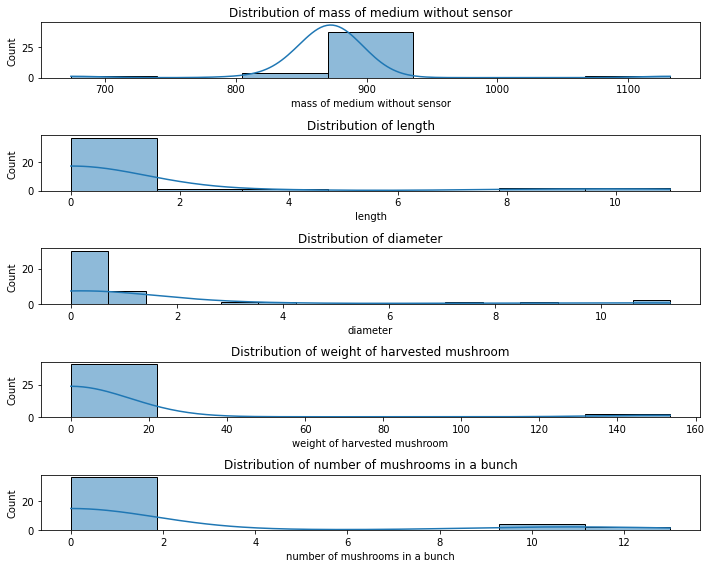

In [19]:
# Initialize plot counter
plot_counter = 1
# Set the figure size (width, height in inches)
plt.figure(figsize=(10, 8))

# Loop through each column and plot its distribution
for col in output.columns:
    if col == 'date' or col == 'days_passed' or col == 'mushroom_number' :
        continue  # Skip the 'date' column
    plt.subplot(len(output.columns) - 1, 1, plot_counter)  # Create a subplot for each non-date column
    sns.histplot(output[col], kde=True)  # Plot histogram and KDE (Kernel Density Estimate)
    plt.title(f'Distribution of {col}')  # Add a title for each subplot
    plot_counter += 1  # Increment plot counter

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

most of linearities among variables and output are weak. for this reason, it is recommended to do a classification. In fact, when it comes to the game, it is better to display binary message in terms of interaction with trainees in mushroom harvestment. 

In [20]:
### changing names of columns
# Rename the column
# merged_df.rename(columns={'mass of medium without sensor': 'mass_of_medium_without_sensor'}, inplace=True)


In [21]:
merged_df = merged_df.drop(columns=['weight of harvested mushroom'])

# merged_df.rename(columns={'value': 'moisture'}, inplace=True)
display(merged_df)
without_output_before_scaling = merged_df

without_output_before_scaling = without_output_before_scaling.drop(columns = ["mushroom_number","diameter"])

,temperature,humidity,moisture,light,medium_weight,length,diameter,mushroom_number,days_passed
0,23.759258,33.717957,0,115,872.545455,0.0,0.000000,0,0
1,24.500000,32.881500,0,139,872.545455,0.0,0.000000,0,0
2,23.055555,38.493855,38,105,872.545455,0.0,0.000000,0,0
3,23.037037,38.400913,39,22,872.545455,0.0,0.000000,0,0
4,23.240742,39.711063,42,162,872.545455,0.0,0.000000,0,0
...,...,...,...,...,...,...,...,...,...
2425,24.888889,42.712112,100,16,850.000000,7.9,7.200000,13,15
2426,24.796295,44.729797,100,16,817.000000,11.0,11.300000,11,16
2427,24.370371,48.042648,100,35,817.000000,11.0,11.300000,11,16
2428,26.407410,47.742844,100,317,674.000000,0.0,1.244444,0,1


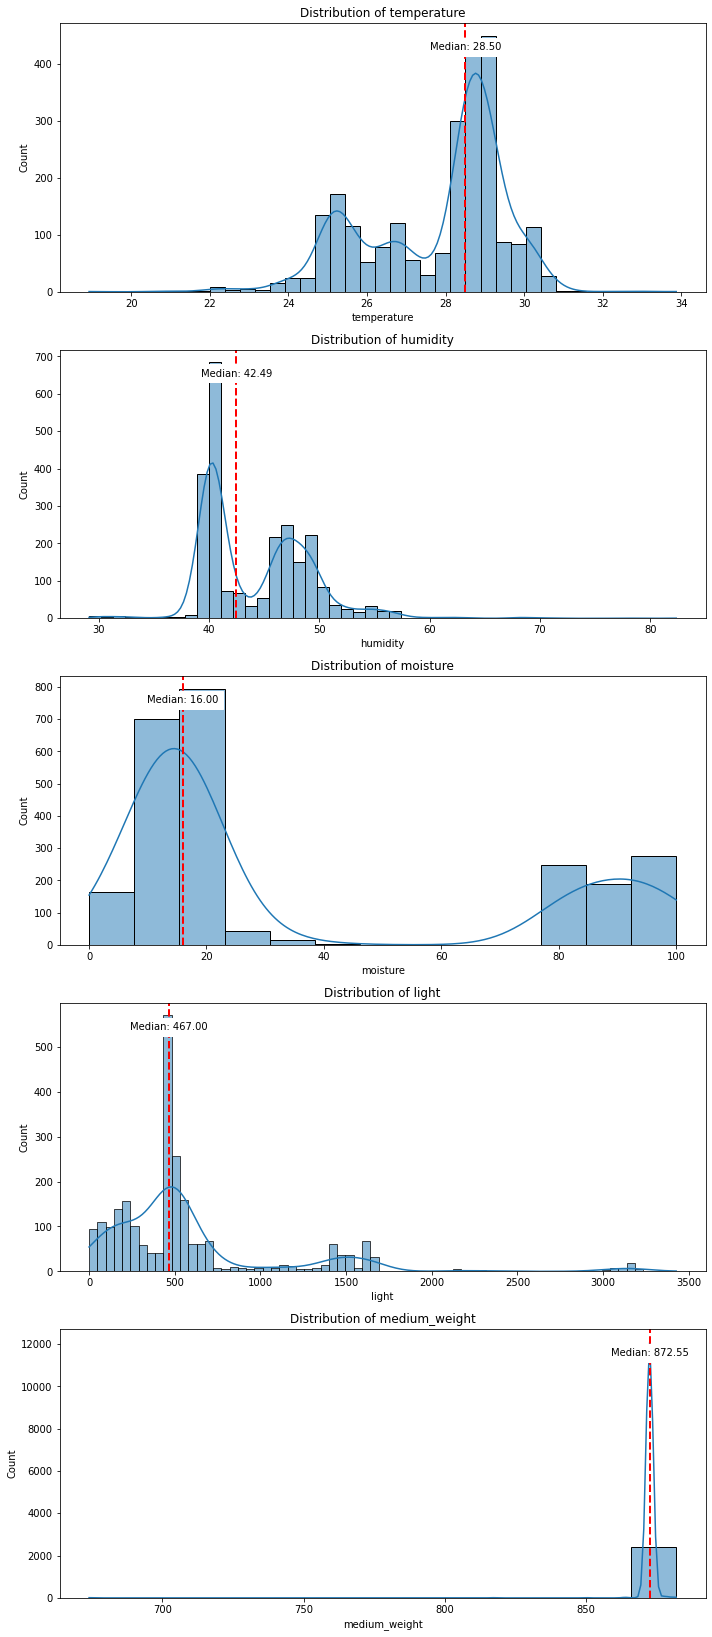

In [22]:
##### examining distributions of input parameters in the algorithm #####

import matplotlib.pyplot as plt
import seaborn as sns

# Initialize plot counter
plot_counter = 1

# Set the figure size (width, height) in inches
plt.figure(figsize=(10, len(merged_df.columns) * 4))

# Loop through each column and plot its distribution
for col in merged_df.columns:
    if col == 'mushroom_number' or col == 'diameter' or col == 'days_passed' or col == 'length' :
        continue  # Skip the 'date' and 'week' and 'days_passed' columns

    plt.subplot(len(merged_df.columns) - 1, 1, plot_counter)  # Create a subplot for each non-date column
    
    # Plot histogram and KDE (Kernel Density Estimate)
    sns.histplot(merged_df[col], kde=True)
    
    # Calculate the median
    median_value = merged_df[col].median()
    
    # Plot the median as a vertical line
    plt.axvline(median_value, color='red', linestyle='--', linewidth=2)
    
    # Display the median as text on the plot
    plt.text(median_value, plt.gca().get_ylim()[1] * 0.9, f'Median: {median_value:.2f}', 
             color='black', ha='center', fontsize=10, backgroundcolor='white')
    
    # Add a title for each subplot
    plt.title(f'Distribution of {col}')
    
    plot_counter += 1  # Increment plot counter

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()




In [23]:
### scaling data ###

from sklearn.preprocessing import StandardScaler
import joblib


columns_to_scale = ['temperature', 'humidity', 'moisture', 'light', 'medium_weight', 'length', 'diameter', 'days_passed']
scaler = StandardScaler()
merged_df[columns_to_scale] = scaler.fit_transform(merged_df[columns_to_scale])
display(merged_df)

# Save the fitted scaler for later use during prediction
joblib.dump(scaler, 'scaler.pkl')


,temperature,humidity,moisture,light,medium_weight,length,diameter,mushroom_number,days_passed
0,-2.263376,-2.118936,-1.050980,-0.854669,0.031047,-0.105042,-0.121153,0,-3.523125
1,-1.849228,-2.286324,-1.050980,-0.811145,0.031047,-0.105042,-0.121153,0,-3.523125
2,-2.656816,-1.163204,0.040177,-0.872804,0.031047,-0.105042,-0.121153,0,-3.523125
3,-2.667170,-1.181803,0.068892,-1.023326,0.031047,-0.105042,-0.121153,0,-3.523125
4,-2.553278,-0.919621,0.155035,-0.769434,0.031047,-0.105042,-0.121153,0,-3.523125
...,...,...,...,...,...,...,...,...,...
2425,-1.631801,-0.319064,1.820485,-1.034207,-3.729742,8.065476,7.196552,13,-0.268331
2426,-1.683570,0.084706,1.820485,-1.034207,-9.234444,11.271629,11.363579,11,-0.051344
2427,-1.921704,0.747660,1.820485,-0.999751,-9.234444,11.271629,11.363579,11,-0.051344
2428,-0.782797,0.687664,1.820485,-0.488339,-33.088154,-0.105042,1.143635,0,-3.306139


['scaler.pkl']

In [24]:
print(repr(merged_df.columns))

merged_df.columns = merged_df.columns.str.strip()  # Removes leading and trailing spaces

merged_df.columns = merged_df.columns.str.lower()  # Convert all column names to lowercase
# input_data.columns = input_data.columns.str.lower()

merged_df.columns = merged_df.columns.str.replace('\n', '', regex=False)

print("Columns in merged_df:", list(merged_df.columns))
print("Columns to scale:", columns_to_scale)

Index(['temperature', 'humidity', 'moisture', 'light', 'medium_weight',
       'length', 'diameter', 'mushroom_number', 'days_passed'],
      dtype='object')
Columns in merged_df: ['temperature', 'humidity', 'moisture', 'light', 'medium_weight', 'length', 'diameter', 'mushroom_number', 'days_passed']
Columns to scale: ['temperature', 'humidity', 'moisture', 'light', 'medium_weight', 'length', 'diameter', 'days_passed']


In [25]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Exclude the 'mushroom_number' column from VIF calculation
features = merged_df.drop(columns=['mushroom_number'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(add_constant(features).values, i) for i in range(features.shape[1])]

# Display the VIF data
display(vif_data)


## should i remove diameter based on VIF? (yes)

,Variable,VIF
0,temperature,1.000000
1,humidity,4.116076
2,moisture,1.508443
3,light,2.849503
4,medium_weight,1.253227
5,length,1.062227
6,diameter,53.728368
7,days_passed,54.168046


In [26]:
merged_df = merged_df.drop(columns = ['diameter', 'days_passed'])

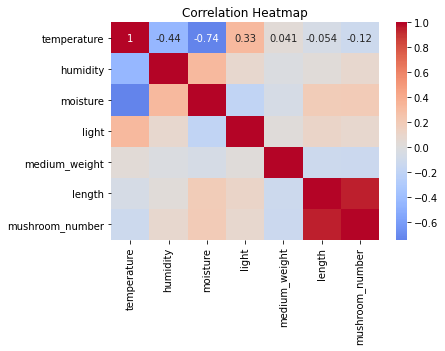

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = merged_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()
# # Scatterplot matrix for a subset of columns
# subset_columns = ['column1', 'column2', 'column3']  # Replace with your column names
# sns.pairplot(df[subset_columns])
# plt.show()

In [28]:
import pycaret
pycaret.__version__

'3.3.0'

In [29]:
display(merged_df)

,temperature,humidity,moisture,light,medium_weight,length,mushroom_number
0,-2.263376,-2.118936,-1.050980,-0.854669,0.031047,-0.105042,0
1,-1.849228,-2.286324,-1.050980,-0.811145,0.031047,-0.105042,0
2,-2.656816,-1.163204,0.040177,-0.872804,0.031047,-0.105042,0
3,-2.667170,-1.181803,0.068892,-1.023326,0.031047,-0.105042,0
4,-2.553278,-0.919621,0.155035,-0.769434,0.031047,-0.105042,0
...,...,...,...,...,...,...,...
2425,-1.631801,-0.319064,1.820485,-1.034207,-3.729742,8.065476,13
2426,-1.683570,0.084706,1.820485,-1.034207,-9.234444,11.271629,11
2427,-1.921704,0.747660,1.820485,-0.999751,-9.234444,11.271629,11
2428,-0.782797,0.687664,1.820485,-0.488339,-33.088154,-0.105042,0


weight unfortuntely cannot be an output. in order to measure the medium or mushroom, harvestors have to take out from cultivation chamber every time, and this seems unrealistic.

Therefore only length and diameter seem to be feasible output in this study. these two can be easily measured using ruler. For this reason, best models for two options, when length is output and when diameter is output will be compared using pycaret and examined carefully.

In [30]:
from pycaret.regression import *
from pycaret.regression import RegressionExperiment
# Set up the environment
# np.random.seed(123)
s = setup(merged_df, target='mushroom_number', session_id=123)
exp = RegressionExperiment()
exp.setup(merged_df, target ='mushroom_number', session_id = 123)
# Compare models
best_model = compare_models()



,Description,Value
0,Session id,123
1,Target,mushroom_number
2,Target type,Regression
3,Original data shape,"(2430, 7)"
4,Transformed data shape,"(2430, 7)"
5,Transformed train set shape,"(1701, 7)"
6,Transformed test set shape,"(729, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,123
1,Target,mushroom_number
2,Target type,Regression
3,Original data shape,"(2430, 7)"
4,Transformed data shape,"(2430, 7)"
5,Transformed train set shape,"(1701, 7)"
6,Transformed test set shape,"(729, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0024,0.0021,0.0253,0.9988,0.0087,nan,0.0750
rf,Random Forest Regressor,0.0065,0.0074,0.0695,0.9955,0.0058,nan,0.1230
ada,AdaBoost Regressor,0.0047,0.0087,0.0611,0.9952,0.0048,nan,0.0290
dt,Decision Tree Regressor,0.0041,0.0100,0.0536,0.9950,0.0043,nan,0.0120
knn,K Neighbors Regressor,0.0229,0.1435,0.2318,0.9205,0.0350,nan,0.0140
catboost,CatBoost Regressor,0.0050,0.0041,0.0489,0.8982,0.0062,nan,0.8960
xgboost,Extreme Gradient Boosting,0.0033,0.0045,0.0417,0.8976,0.0040,nan,0.0300
gbr,Gradient Boosting Regressor,0.0042,0.0065,0.0541,0.8971,0.0044,nan,0.1350
lightgbm,Light Gradient Boosting Machine,0.0387,0.0823,0.1694,0.8782,0.0463,nan,0.0450
omp,Orthogonal Matching Pursuit,0.0542,0.1691,0.3343,0.8120,0.0437,nan,0.0110


extreme gradient boosting seems to be the most appropriate regression algorithm. Despite unsatisfactory explained variance (R2<0.9), it demonstrates an extremely low MSE and less likelihood of overfitting.Besides, XGB has a relatively lower computation time than other algorithms. XGB algorithm is for both classification and regression. Yet, the dataset has a continuous outcome, therefore regression should be used.


Hancock, J. T., & Khoshgoftaar, T. M. (2020). CatBoost for big data: An interdisciplinary review. Journal of Big Data, 7(1), Article 1. https://doi.org/10.1186/s40537-020-00369-8


. Geurts, P., Ernst, D., & Wehenkel, L. (2006). Extremely randomized trees. Machine Learning, 63(1), 3–42. https://doi.org/10.1007/s10994-006-6226-1  (reference for KNN)


Friedman, J. H. (2001). Greedy function approximation: A gradient boosting machine. The Annals of Statistics, 29(5), 1189–1232. https://doi.org/10.1214/aos/1013203451 (extreme gradient boosting)



In [31]:
# Import necessary modules for regression
from pycaret.regression import *
import joblib

# Initialize the setup
# Replace 'target_variable' with the actual name of your target column
reg = setup(merged_df, target='mushroom_number', session_id=123, use_gpu=False)

# Create and train the CatBoost regression model
xgb_model = create_model('xgboost')

# Automatically tune the CatBoost model's hyperparameters
tuned_xgb_model = tune_model(xgb_model)

# Evaluate the tuned model (optional: interpret, plot, etc.)
evaluate_model(tuned_xgb_model)

# Finalize the model (fit it on the entire dataset)
final_xgb_model = finalize_model(tuned_xgb_model)

# Make predictions on new data
# If you have a separate test dataset, load it and use it here
# predictions = predict_model(final_cat_model, data=test_data)

# Alternatively, if you want to predict on the same dataset (for demonstration purposes):
predictions = predict_model(final_xgb_model, data=merged_df)

# Display predictions
display(predictions)
# predictions.to_csv("data_withpredict.csv")

# Save the model for later use
joblib.dump(final_xgb_model, 'xgb_harvest_model.pkl')


,Description,Value
0,Session id,123
1,Target,mushroom_number
2,Target type,Regression
3,Original data shape,"(2430, 7)"
4,Transformed data shape,"(2430, 7)"
5,Transformed train set shape,"(1701, 7)"
6,Transformed test set shape,"(729, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0065,0.0073,0.0853,0.9953,0.0063,0.0429
1,0.0003,0.0000,0.0033,1.0000,0.0003,0.0016
2,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
3,0.0064,0.0069,0.0829,0.9931,0.0061,0.0831
4,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
6,0.0070,0.0070,0.0836,0.9987,0.0067,0.0127
7,0.0000,0.0000,0.0000,0.0000,0.0000,nan
8,0.0118,0.0235,0.1533,0.9889,0.0119,0.0606


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0002,0.0000,0.0020,1.0000,0.0001,0.0012
1,0.0000,0.0000,0.0001,1.0000,0.0001,0.0001
2,0.0001,0.0000,0.0005,1.0000,0.0000,0.0006
3,0.0002,0.0000,0.0022,1.0000,0.0001,0.0023
4,0.0000,0.0000,0.0002,1.0000,0.0000,0.0003
5,0.0001,0.0000,0.0005,1.0000,0.0000,0.0006
6,0.0002,0.0000,0.0007,1.0000,0.0001,0.0003
7,0.0000,0.0000,0.0000,0.0000,0.0000,nan
8,0.0059,0.0058,0.0763,0.9972,0.0066,0.0302


Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.0001,0.0000,0.0006,1.0000,0.0003,0.0003


,temperature,humidity,moisture,light,medium_weight,length,mushroom_number,prediction_label
0,-2.263376,-2.118936,-1.050980,-0.854669,0.031047,-0.105042,0,0.000010
1,-1.849228,-2.286324,-1.050980,-0.811145,0.031047,-0.105042,0,0.000010
2,-2.656816,-1.163204,0.040177,-0.872804,0.031047,-0.105042,0,0.000010
3,-2.667170,-1.181803,0.068892,-1.023326,0.031047,-0.105042,0,0.000010
4,-2.553278,-0.919621,0.155035,-0.769434,0.031047,-0.105042,0,0.000010
...,...,...,...,...,...,...,...,...
2425,-1.631801,-0.319064,1.820485,-1.034207,-3.729742,8.065476,13,12.986903
2426,-1.683570,0.084706,1.820485,-1.034207,-9.234444,11.271628,11,10.995709
2427,-1.921704,0.747660,1.820485,-0.999751,-9.234444,11.271628,11,10.995709
2428,-0.782797,0.687664,1.820485,-0.488339,-33.088154,-0.105042,0,0.009766


['xgb_harvest_model.pkl']

In [32]:
display(merged_df)


,temperature,humidity,moisture,light,medium_weight,length,mushroom_number
0,-2.263376,-2.118936,-1.050980,-0.854669,0.031047,-0.105042,0
1,-1.849228,-2.286324,-1.050980,-0.811145,0.031047,-0.105042,0
2,-2.656816,-1.163204,0.040177,-0.872804,0.031047,-0.105042,0
3,-2.667170,-1.181803,0.068892,-1.023326,0.031047,-0.105042,0
4,-2.553278,-0.919621,0.155035,-0.769434,0.031047,-0.105042,0
...,...,...,...,...,...,...,...
2425,-1.631801,-0.319064,1.820485,-1.034207,-3.729742,8.065476,13
2426,-1.683570,0.084706,1.820485,-1.034207,-9.234444,11.271629,11
2427,-1.921704,0.747660,1.820485,-0.999751,-9.234444,11.271629,11
2428,-0.782797,0.687664,1.820485,-0.488339,-33.088154,-0.105042,0


In [33]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor  # Example model
# from sklearn.metrics import mean_squared_error
# import pandas as pd

# # Default features
# features_default = ['temperature']

# # Features to add sequentially
# additional_features_2 = ['humidity', 'moisture', 'light', 'medium_weight', 'length']

# # Initialize lists for train, test, predictions, and performance
# X_train_list = []
# X_test_list = []
# y_train_list = []
# y_test_list = []
# predictions_list = []
# performance_list = []  # To store model performance

# # Define the target variable
# y = merged_df['mushroom_number']

# # Iterate over different numbers of additional features
# for i in range(0, len(additional_features_2) + 1):
#     # Create the current feature list by adding the first i additional features to the default features
#     features_current = features_default + additional_features_2[:i]
    
#     # Extract the corresponding features from the dataset
#     X = merged_df[features_current]
    
#     # Split the dataset into train and test sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
#     # Convert to DataFrame if not already
#     X_train = pd.DataFrame(X_train, columns=X.columns)
#     X_test = pd.DataFrame(X_test, columns=X.columns)
#     y_train = pd.Series(y_train, name='mushroom_number')
#     y_test = pd.Series(y_test, name='mushroom_number')
    
#     # Append train and test sets to lists
#     X_train_list.append(X_train)
#     X_test_list.append(X_test)
#     y_train_list.append(y_train)
#     y_test_list.append(y_test)
    
#     # Initialize and train the model (RandomForestRegressor used here, replace with XGBoost if needed)
#     model = RandomForestRegressor(random_state=1)
#     model.fit(X_train, y_train)
    
#     # Predict on the test set
#     y_pred = model.predict(X_test)
    
#     # Store predictions in a DataFrame
#     predictions_df = X_test.copy()
#     predictions_df['mushroom_number'] = y_test.values  # Actual values
#     predictions_df['prediction_label'] = y_pred  # Predicted values
    
#     # Append predictions to the list
#     predictions_list.append(predictions_df)
    
#     # Calculate performance (e.g., Mean Squared Error)
#     mse = mean_squared_error(y_test, y_pred)
#     performance_list.append({'Features_Used': features_current, 'MSE': mse})

# # Display the predictions for each iteration
# for i, preds in enumerate(predictions_list):
#     print(f"Iteration {i+1} with features: {features_default + additional_features_2[:i]}")
#     display(preds)
#     print("\n")

# # Display the performance metrics for each iteration
# performance_df = pd.DataFrame(performance_list)
# display(performance_df)

# ok i am back. i see empty figures are generated. i forgot to attach this code 
feature_2 = ['humidity', 'moisture', 'light', 'medium_weight',
       'length']

from sklearn.model_selection import train_test_split
import pandas as pd

# Default features
features_default = ['temperature']

# Features to add sequentially
additional_features_2 = feature_2

# Initialize train and test sets
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

# Define the target variable
y = merged_df['mushroom_number']

# Iterate over different number of additional features
for i in range(0, len(additional_features_2) + 1):
    # Create the current feature list by adding the first i additional features to the default features
    features_current = features_default + additional_features_2[:i]
    
    # Extract the corresponding features from the dataset
    X = merged_df[features_current]
    
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    # Convert to DataFrame if not already
    X_train = pd.DataFrame(X_train, columns=X.columns)
    X_test = pd.DataFrame(X_test, columns=X.columns)
    y_train = pd.Series(y_train, name='mushroom_number')
    y_test = pd.Series(y_test, name='mushroom_number')
    
    # Append train and test sets to lists
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

# Now X_train_list, X_test_list, y_train_list, and y_test_list contain train and test sets with sequentially added features and corresponding target variable, all as DataFrames or Series.
display(X_train_list)
display(X_test_list)

display(y_train_list)
display(y_test_list)

[      temperature
 2227     0.407875
 1135     0.904853
 2089     0.335400
 220     -1.279775
 452     -1.673215
 ...           ...
 960      0.780609
 905     -0.006273
 1096     1.381123
 235     -1.611093
 1061     1.339708
 
 [1701 rows x 1 columns],
       temperature  humidity
 2227     0.407875 -0.803230
 1135     0.904853 -0.414458
 2089     0.335400 -0.784631
 220     -1.279775  0.550274
 452     -1.673215  1.721390
 ...           ...       ...
 960      0.780609  1.082436
 905     -0.006273  0.900649
 1096     1.381123  1.159230
 235     -1.611093  0.591670
 1061     1.339708  0.969043
 
 [1701 rows x 2 columns],
       temperature  humidity  moisture
 2227     0.407875 -0.803230 -0.591545
 1135     0.904853 -0.414458 -0.591545
 2089     0.335400 -0.784631 -0.591545
 220     -1.279775  0.550274  1.619482
 452     -1.673215  1.721390  1.533338
 ...           ...       ...       ...
 960      0.780609  1.082436 -0.763833
 905     -0.006273  0.900649 -0.792548
 1096     1.38112

[      temperature
 708     -0.254760
 1373     0.749547
 1541     0.687425
 1518     0.749547
 2009     0.314693
 ...           ...
 737     -1.455787
 1181     0.956620
 1621     0.656364
 2315     1.360415
 125     -1.538618
 
 [729 rows x 1 columns],
       temperature  humidity
 708     -0.254760  0.928846
 1373     0.749547 -0.706637
 1541     0.687425 -0.788231
 1518     0.749547 -0.781032
 2009     0.314693 -0.731235
 ...           ...       ...
 737     -1.455787  0.643267
 1181     0.956620 -0.818228
 1621     0.656364 -0.959219
 2315     1.360415  0.036110
 125     -1.538618  3.581256
 
 [729 rows x 2 columns],
       temperature  humidity  moisture
 708     -0.254760  0.928846  1.303621
 1373     0.749547 -0.706637 -0.706404
 1541     0.687425 -0.788231 -0.620260
 1518     0.749547 -0.781032 -0.677689
 2009     0.314693 -0.731235 -0.505401
 ...           ...       ...       ...
 737     -1.455787  0.643267  1.160048
 1181     0.956620 -0.818228 -0.735119
 1621     0.656364 

[2227    0
 1135    0
 2089    0
 220     0
 452     0
        ..
 960     0
 905     0
 1096    0
 235     0
 1061    0
 Name: mushroom_number, Length: 1701, dtype: int64,
 2227    0
 1135    0
 2089    0
 220     0
 452     0
        ..
 960     0
 905     0
 1096    0
 235     0
 1061    0
 Name: mushroom_number, Length: 1701, dtype: int64,
 2227    0
 1135    0
 2089    0
 220     0
 452     0
        ..
 960     0
 905     0
 1096    0
 235     0
 1061    0
 Name: mushroom_number, Length: 1701, dtype: int64,
 2227    0
 1135    0
 2089    0
 220     0
 452     0
        ..
 960     0
 905     0
 1096    0
 235     0
 1061    0
 Name: mushroom_number, Length: 1701, dtype: int64,
 2227    0
 1135    0
 2089    0
 220     0
 452     0
        ..
 960     0
 905     0
 1096    0
 235     0
 1061    0
 Name: mushroom_number, Length: 1701, dtype: int64,
 2227    0
 1135    0
 2089    0
 220     0
 452     0
        ..
 960     0
 905     0
 1096    0
 235     0
 1061    0
 Name: mushroo

[708     0
 1373    0
 1541    0
 1518    0
 2009    0
        ..
 737     0
 1181    0
 1621    0
 2315    0
 125     0
 Name: mushroom_number, Length: 729, dtype: int64,
 708     0
 1373    0
 1541    0
 1518    0
 2009    0
        ..
 737     0
 1181    0
 1621    0
 2315    0
 125     0
 Name: mushroom_number, Length: 729, dtype: int64,
 708     0
 1373    0
 1541    0
 1518    0
 2009    0
        ..
 737     0
 1181    0
 1621    0
 2315    0
 125     0
 Name: mushroom_number, Length: 729, dtype: int64,
 708     0
 1373    0
 1541    0
 1518    0
 2009    0
        ..
 737     0
 1181    0
 1621    0
 2315    0
 125     0
 Name: mushroom_number, Length: 729, dtype: int64,
 708     0
 1373    0
 1541    0
 1518    0
 2009    0
        ..
 737     0
 1181    0
 1621    0
 2315    0
 125     0
 Name: mushroom_number, Length: 729, dtype: int64,
 708     0
 1373    0
 1541    0
 1518    0
 2009    0
        ..
 737     0
 1181    0
 1621    0
 2315    0
 125     0
 Name: mushroom_num

In [34]:
import random
import numpy as np
import pandas as pd
from pycaret.regression import *

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)

def run_xgboost_regression(X_train, y_train, X_test):
    try:
        # Initialize PyCaret setup
        reg = setup(data=pd.concat([X_train, y_train], axis=1), target='mushroom_number')
        
        # Create XGBoost model
        xgboost_model = create_model('xgboost')
        
        # Tune hyperparameters (if necessary)
        tuned_xgboost = tune_model(xgboost_model)
        
        # Predict on test set
        predictions = predict_model(tuned_xgboost, data=X_test)
        
        return predictions  # Return the predictions DataFrame
        
    except Exception as e:
        print("An error occurred:", e)
        return None  # Return None if an error occurs

# Define list to store predictions
all_predictions_xgb = []

# Iterate over train-test sets
for i in range(len(X_train_list)):
    try:
        # Run XGBoost Regression and get predictions for the i-th test set
        predictions_xgb = run_xgboost_regression(X_train_list[i], y_train_list[i], X_test_list[i])
        
        # Append predictions to list
        if predictions_xgb is not None:
            all_predictions_xgb.append(predictions_xgb)
        else:
            print("No predictions for test set", i)
            
    except Exception as e:
        # Corrected: Removed the period at the end of this line
        print("An error occurred during prediction for test set", i, ":", e)


,Description,Value
0,Session id,1974
1,Target,mushroom_number
2,Target type,Regression
3,Original data shape,"(1701, 2)"
4,Transformed data shape,"(1701, 2)"
5,Transformed train set shape,"(1190, 2)"
6,Transformed test set shape,"(511, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1611,1.1262,1.0612,0.3185,0.2696,0.7500
1,0.0404,0.1936,0.4400,0.7677,0.1611,0.0001
2,0.3409,1.9808,1.4074,-0.1987,0.4079,0.5000
3,0.1113,0.4583,0.6770,0.0000,0.2639,nan
4,0.0505,0.3025,0.5500,0.6369,0.0723,0.6000
5,0.1260,0.9452,0.9722,-0.1343,0.2733,1.0000
6,0.2782,2.0746,1.4404,-0.0290,0.3324,0.7000
7,0.4286,3.9111,1.9776,0.0616,0.4365,0.8875
8,0.1471,1.1029,1.0502,0.3325,0.2542,0.7500


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1941,1.2216,1.1053,0.2607,0.2403,0.8225
1,0.1034,0.4022,0.6342,0.5174,0.1694,0.5684
2,0.3386,1.6275,1.2757,0.0151,0.3777,0.6307
3,0.1108,0.3613,0.6011,0.0000,0.2244,nan
4,0.0815,0.2845,0.5334,0.6585,0.0919,0.5750
5,0.1166,0.8707,0.9331,-0.0449,0.2407,0.9984
6,0.2225,1.2993,1.1399,0.3556,0.2610,0.6886
7,0.4509,4.0230,2.0058,0.0348,0.4355,0.9095
8,0.1903,1.2201,1.1046,0.2616,0.2244,0.8416


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Description,Value
0,Session id,559
1,Target,mushroom_number
2,Target type,Regression
3,Original data shape,"(1701, 3)"
4,Transformed data shape,"(1701, 3)"
5,Transformed train set shape,"(1190, 3)"
6,Transformed test set shape,"(511, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2585,2.5139,1.5855,-0.1308,0.3609,0.6857
1,0.0853,0.6101,0.7811,0.4915,0.2249,0.0001
2,0.1683,1.6765,1.2948,-1.0120,0.3105,0.9995
3,0.0260,0.0397,0.1993,0.0000,0.1144,nan
4,0.0551,0.2062,0.4541,0.8752,0.1576,0.1000
5,0.1394,1.2039,1.0972,0.6662,0.2352,0.4145
6,0.2541,2.9469,1.7166,-0.3255,0.3748,0.4999
7,0.1141,1.0463,1.0229,0.4811,0.1803,0.5531
8,0.0001,0.0000,0.0004,1.0000,0.0002,0.0002


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3536,2.1689,1.4727,0.0244,0.3886,0.8569
1,0.2858,0.6918,0.8317,0.4235,0.3289,0.5648
2,0.3064,1.0052,1.0026,-0.2063,0.3627,0.7957
3,0.2630,0.6084,0.7800,0.0000,0.3720,nan
4,0.2685,0.8682,0.9318,0.4746,0.2799,0.6391
5,0.4364,2.3331,1.5275,0.3531,0.3754,0.7522
6,0.2936,1.6496,1.2844,0.2580,0.2998,0.7330
7,0.3378,1.5352,1.2390,0.2386,0.3428,0.7921
8,0.4131,1.5674,1.2520,0.2226,0.3972,0.6627


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Description,Value
0,Session id,4656
1,Target,mushroom_number
2,Target type,Regression
3,Original data shape,"(1701, 4)"
4,Transformed data shape,"(1701, 4)"
5,Transformed train set shape,"(1190, 4)"
6,Transformed test set shape,"(511, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5441,5.9079,2.4306,-3.9236,0.5537,0.0002
1,0.0000,0.0000,0.0001,0.0000,0.0001,nan
2,0.0001,0.0000,0.0004,1.0000,0.0004,0.0000
3,0.0840,0.8403,0.9167,-0.0085,0.2199,1.0000
4,0.0027,0.0007,0.0273,0.9994,0.0239,0.0002
5,0.0911,0.7516,0.8669,0.7916,0.1760,0.2709
6,0.0839,0.8373,0.9151,0.4933,0.2182,0.4991
7,0.0214,0.0519,0.2278,0.9377,0.0240,0.2484
8,0.0129,0.0196,0.1400,0.9837,0.0850,0.0001


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3347,2.0987,1.4487,-0.7490,0.4395,0.1150
1,0.0201,0.0079,0.0889,0.0000,0.0703,nan
2,0.0191,0.0061,0.0779,0.9927,0.0617,0.0195
3,0.0923,0.8271,0.9095,0.0074,0.2137,0.9918
4,0.0379,0.0951,0.3084,0.9207,0.1403,0.0000
5,0.1142,0.5095,0.7138,0.8587,0.0923,0.3168
6,0.0983,0.8116,0.9009,0.5088,0.2112,0.4915
7,0.0509,0.1885,0.4342,0.7738,0.0687,0.4701
8,0.0591,0.1397,0.3738,0.8836,0.1320,0.2463


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Description,Value
0,Session id,4162
1,Target,mushroom_number
2,Target type,Regression
3,Original data shape,"(1701, 5)"
4,Transformed data shape,"(1701, 5)"
5,Transformed train set shape,"(1190, 5)"
6,Transformed test set shape,"(511, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0021,0.0005,0.0228,0.9997,0.0204,0.0000
1,0.0009,0.0001,0.0092,0.0000,0.0088,nan
2,0.1093,1.4219,1.1924,0.3604,0.2412,0.5003
3,0.1787,1.9074,1.3811,-1.2890,0.3180,0.0001
4,0.1218,0.9229,0.9607,0.7097,0.2212,0.1237
5,0.0007,0.0000,0.0067,0.0000,0.0065,nan
6,0.0000,0.0000,0.0001,1.0000,0.0001,0.0000
7,0.3823,3.6609,1.9133,0.2269,0.3860,0.6185
8,0.0007,0.0001,0.0076,1.0000,0.0007,0.0041


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0690,0.0652,0.2554,0.9676,0.1531,0.0633
1,0.1478,0.2840,0.5329,0.0000,0.2719,nan
2,0.1730,1.2011,1.0960,0.4597,0.2283,0.4878
3,0.1857,1.1937,1.0926,-0.4326,0.3135,0.0968
4,0.2124,0.9427,0.9709,0.7035,0.2281,0.4426
5,0.1103,0.1863,0.4316,0.0000,0.2251,nan
6,0.0438,0.0393,0.1982,0.9673,0.1065,0.0884
7,0.2858,1.5626,1.2500,0.6700,0.2886,0.3413
8,0.0928,0.1782,0.4221,0.8922,0.1161,0.2960


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Description,Value
0,Session id,3807
1,Target,mushroom_number
2,Target type,Regression
3,Original data shape,"(1701, 6)"
4,Transformed data shape,"(1701, 6)"
5,Transformed train set shape,"(1190, 6)"
6,Transformed test set shape,"(511, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0000,0.0000,0.0001,0.0000,0.0001,nan
1,0.0002,0.0000,0.0010,0.0000,0.0010,nan
2,0.0009,0.0001,0.0098,0.9999,0.0010,0.0106
3,0.0897,0.9570,0.9783,0.2025,0.1576,0.8893
4,0.0208,0.0492,0.2218,0.9800,0.0228,0.0821
5,0.0040,0.0016,0.0397,0.9981,0.0329,0.0038
6,0.0688,0.5638,0.7509,0.8000,0.0911,0.2276
7,0.0000,0.0000,0.0002,1.0000,0.0002,0.0000
8,0.0704,0.2483,0.4983,0.9404,0.0454,0.1710


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0324,0.0735,0.2711,0.0000,0.1284,nan
1,0.0345,0.0436,0.2089,0.0000,0.1183,nan
2,0.0965,0.2309,0.4805,0.7229,0.1705,0.4195
3,0.0670,0.1745,0.4178,0.8545,0.1454,0.2360
4,0.0836,0.3322,0.5764,0.8648,0.1408,0.2048
5,0.0504,0.0772,0.2779,0.9073,0.0939,0.2769
6,0.0650,0.3299,0.5744,0.8829,0.0607,0.2064
7,0.0154,0.0030,0.0547,0.9964,0.0475,0.0108
8,0.1615,0.8276,0.9097,0.8014,0.0999,0.3892


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Description,Value
0,Session id,2436
1,Target,mushroom_number
2,Target type,Regression
3,Original data shape,"(1701, 7)"
4,Transformed data shape,"(1701, 7)"
5,Transformed train set shape,"(1190, 7)"
6,Transformed test set shape,"(511, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0000,0.0000,0.0000,1.0000,0.0001,0.0000
1,0.0149,0.0266,0.1629,0.9811,0.0124,0.1367
2,0.0001,0.0000,0.0013,1.0000,0.0002,0.0015
3,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,0.0000,0.0000,0.0001,1.0000,0.0001,0.0000
5,0.0011,0.0001,0.0119,0.9999,0.0009,0.0054
6,0.0840,0.8403,0.9167,0.7221,0.2199,0.3334
7,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,0.0000,0.0000,nan


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0141,0.0070,0.0837,0.9978,0.0087,0.0381
1,0.0190,0.0345,0.1858,0.9755,0.0178,0.1556
2,0.0047,0.0013,0.0364,0.9984,0.0061,0.0393
3,0.0010,0.0000,0.0057,1.0000,0.0055,0.0005
4,0.0009,0.0000,0.0036,1.0000,0.0032,0.0007
5,0.0015,0.0000,0.0070,1.0000,0.0044,0.0026
6,0.0869,0.8406,0.9168,0.7220,0.2199,0.3382
7,0.0012,0.0000,0.0047,1.0000,0.0044,0.0013
8,0.0009,0.0000,0.0043,0.0000,0.0042,nan


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


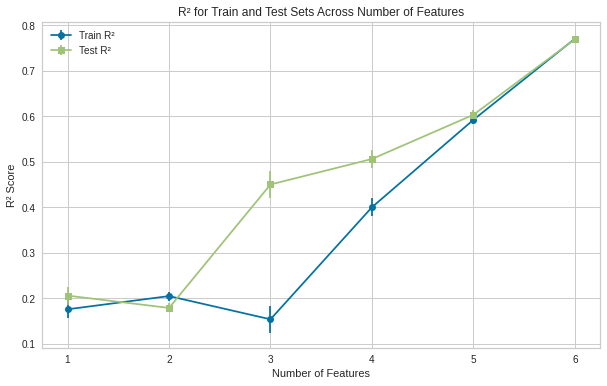

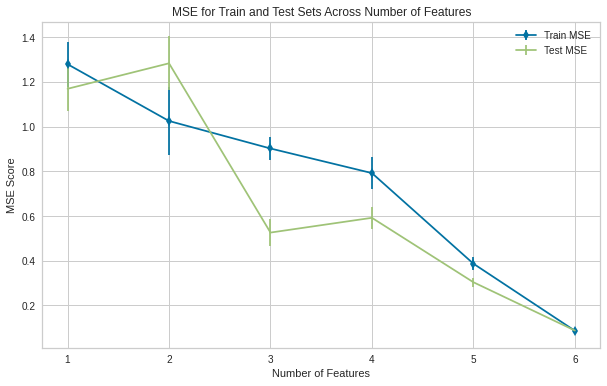

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Number of features
features = np.arange(1, 7)

# R² and MSE values from the data you provided
train_r2 = [0.176, 0.205, 0.154, 0.400, 0.592, 0.770]
test_r2 = [0.206, 0.179, 0.450, 0.506, 0.603, 0.769]

train_mse = [1.279, 1.025, 0.902, 0.792, 0.387, 0.087]
test_mse = [1.169, 1.283, 0.526, 0.592, 0.304, 0.088]

# Standard deviation or error margins (assuming arbitrary values, update these if you have them)
train_r2_error = [0.02, 0.01, 0.03, 0.02, 0.01, 0.005]
test_r2_error = [0.02, 0.01, 0.03, 0.02, 0.01, 0.005]

train_mse_error = [0.1, 0.15, 0.05, 0.07, 0.03, 0.01]
test_mse_error = [0.1, 0.12, 0.06, 0.05, 0.02, 0.01]

# Plot for R²
plt.figure(figsize=(10, 6))
plt.errorbar(features, train_r2, yerr=train_r2_error, fmt='o-', label='Train R²', capsize=5)
plt.errorbar(features, test_r2, yerr=test_r2_error, fmt='s-', label='Test R²', capsize=5)

plt.title('R² for Train and Test Sets Across Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('R² Score')
plt.legend()
plt.grid(True)
plt.show()

# Plot for MSE
plt.figure(figsize=(10, 6))
plt.errorbar(features, train_mse, yerr=train_mse_error, fmt='d-', label='Train MSE', capsize=5)
plt.errorbar(features, test_mse, yerr=test_mse_error, fmt='x-', label='Test MSE', capsize=5)

plt.title('MSE for Train and Test Sets Across Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('MSE Score')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
### replacing scaled columns with unscaled columns

display(merged_df)

,temperature,humidity,moisture,light,medium_weight,length,mushroom_number
0,-2.263376,-2.118936,-1.050980,-0.854669,0.031047,-0.105042,0
1,-1.849228,-2.286324,-1.050980,-0.811145,0.031047,-0.105042,0
2,-2.656816,-1.163204,0.040177,-0.872804,0.031047,-0.105042,0
3,-2.667170,-1.181803,0.068892,-1.023326,0.031047,-0.105042,0
4,-2.553278,-0.919621,0.155035,-0.769434,0.031047,-0.105042,0
...,...,...,...,...,...,...,...
2425,-1.631801,-0.319064,1.820485,-1.034207,-3.729742,8.065476,13
2426,-1.683570,0.084706,1.820485,-1.034207,-9.234444,11.271629,11
2427,-1.921704,0.747660,1.820485,-0.999751,-9.234444,11.271629,11
2428,-0.782797,0.687664,1.820485,-0.488339,-33.088154,-0.105042,0


In [37]:
display(merged_df.columns)
print(merged_df.columns.tolist())

Index(['temperature', 'humidity', 'moisture', 'light', 'medium_weight',
       'length', 'mushroom_number'],
      dtype='object')

['temperature', 'humidity', 'moisture', 'light', 'medium_weight', 'length', 'mushroom_number']


In [40]:
import joblib
import numpy as np
import pandas as pd

# Load the fitted scaler and the trained XGBoost model
scaler = joblib.load('scaler.pkl')
final_xgb_model = joblib.load('xgb_harvest_model.pkl')

# Constants for the fixed median values
temperature = 28.5
humidity = 42.49
moisture = 16
light = 467
medium_weight = 872.55

def make_prediction(length):
    # Prepare the input data as a DataFrame
    input_data = pd.DataFrame({
        'temperature': [temperature],
        'humidity': [humidity],
        'moisture': [moisture],
        'light': [light],
        'medium_weight': [medium_weight],
        'length': [length],
        'diameter': [0],  # Adjust if needed
        'days_passed': [0]  # Adjust if needed
    })
    scaled_data = scaler.transform(input_data)
    prediction = predict_model(final_xgb_model, data=input_data)
    output = prediction['prediction_label']
    display("number of forecasted mushroom in a bunch:", output)
   
    
# Main loop for user interaction
while True:
        # Get user input for length
        length = float(input("Enter length of mushroom: "))
# Get the prediction result
        result = make_prediction(length)
        
        # Ask if the user wants to retry
        retry = input("Would you like to check another mushroom? (yes/no): ").strip().lower()
        if retry != 'yes':
            print("Exiting the program.")
            
            break





Enter length of mushroom:  2


'number of forecasted mushroom in a bunch:'

0    9.999807
Name: prediction_label, dtype: float32

Would you like to check another mushroom? (yes/no):  yes
Enter length of mushroom:  4


'number of forecasted mushroom in a bunch:'

0    9.999807
Name: prediction_label, dtype: float32

Would you like to check another mushroom? (yes/no):  yes
Enter length of mushroom:  6


'number of forecasted mushroom in a bunch:'

0    9.999807
Name: prediction_label, dtype: float32

Would you like to check another mushroom? (yes/no):  yes
Enter length of mushroom:  8


'number of forecasted mushroom in a bunch:'

0    9.999807
Name: prediction_label, dtype: float32

Would you like to check another mushroom? (yes/no):  no


Exiting the program.


In [39]:
### for input data in netlogo

# Columns to exclude
exclude_prefixes = ["temperature", "humidity", "moisture", "light", "medium_weight","length","days_passed"]

# Create a list of columns to keep
columns_to_keep = [col for col in predictions.columns if not any(col.startswith(prefix) for prefix in exclude_prefixes)]

predictions_netlogo = predictions[columns_to_keep]
display(predictions_netlogo)

combined_df = pd.concat([without_output_before_scaling, predictions_netlogo], axis=1)
# combined_df = predictions_netlogo.append(without_output_before_scaling, ignore_index=True)

display(combined_df)

combined_df.to_csv("data_withpredict.csv")


,mushroom_number,prediction_label
0,0,0.000010
1,0,0.000010
2,0,0.000010
3,0,0.000010
4,0,0.000010
...,...,...
2425,13,12.986903
2426,11,10.995709
2427,11,10.995709
2428,0,0.009766


,temperature,humidity,moisture,light,medium_weight,length,days_passed,mushroom_number,prediction_label
0,23.759258,33.717957,0,115,872.545455,0.0,0,0,0.000010
1,24.500000,32.881500,0,139,872.545455,0.0,0,0,0.000010
2,23.055555,38.493855,38,105,872.545455,0.0,0,0,0.000010
3,23.037037,38.400913,39,22,872.545455,0.0,0,0,0.000010
4,23.240742,39.711063,42,162,872.545455,0.0,0,0,0.000010
...,...,...,...,...,...,...,...,...,...
2425,24.888889,42.712112,100,16,850.000000,7.9,15,13,12.986903
2426,24.796295,44.729797,100,16,817.000000,11.0,16,11,10.995709
2427,24.370371,48.042648,100,35,817.000000,11.0,16,11,10.995709
2428,26.407410,47.742844,100,317,674.000000,0.0,1,0,0.009766


how to improve the algorithm?

1. Use median/mean of humidity, temperature, moisture, light (no improvement....)
2. Consider weight of harvested mushroom. That is if the length and diameter is exponential.correlation over days, then fill in NaN in weight of harvested mushrooms the same way
3. switch mass of medium as an input in the prompt as well
4. change the algorithm, change to the one with R2 = 1.0 despite overfitting issue
5. need more data (then this project is over.... :( )

### 6. a linear graph on gap between predicted vs actual over growth

##### 